In [1]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
GP = {
    'dim' : 2, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.32,
    'res' : 20, #resolution within one period
    'downsample_ratio': 0.1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.12, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.31,
    'dh' : 0.005, #the step size of h.
    'path' : "sim_cache_TiO2_lam660nm/", #the inter state store path            
}

In [4]:
sim = Meta_SCMT.Sim(**GP)

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\simulator.py:73: UserWarning: Your global parameters have changed. be careful loading any cached data, it may be in consist!
  warnings.warn('Your global parameters have changed. be careful loading any cached data, it may be in consist!')


If dowmsample_ratio changed, it only need to rerun fitting E.
It is ok to change n_sub, which is decoupled with the cached data.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:24: UserWarning: Unlike gen modes 1D which is done locally. gen modes 2D is tricky. because we have to comunicate with tidy3d. Error can happen.            To debug, you have to get yourself familiar with tidy3d (the ideal of upload sim to cloud and download results after the sim is done.            Or, you can try to restart your jupyter notebook and running everythin from begining. The drawback is gen_modes() is usually slow and restart won't promise good results.
  warnings.warn("Unlike gen modes 1D which is done locally. gen modes 2D is tricky. because we have to comunicate with tidy3d. Error can happen.\


Initializing simulation...
Mesh step (micron): [5.00e-02, 5.00e-02, 5.00e-02].
Simulation domain in number of grid points: [88, 88, 50].
Total number of computational grid points: 3.87e+05.
Total number of time steps: 1.
Estimated data size (GB) of monitor monitor: 0.0002.
Mode set, recommend verifying using viz_modes.


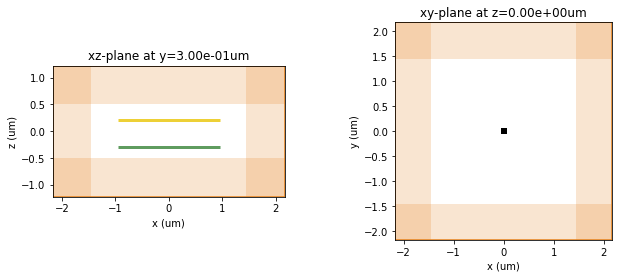

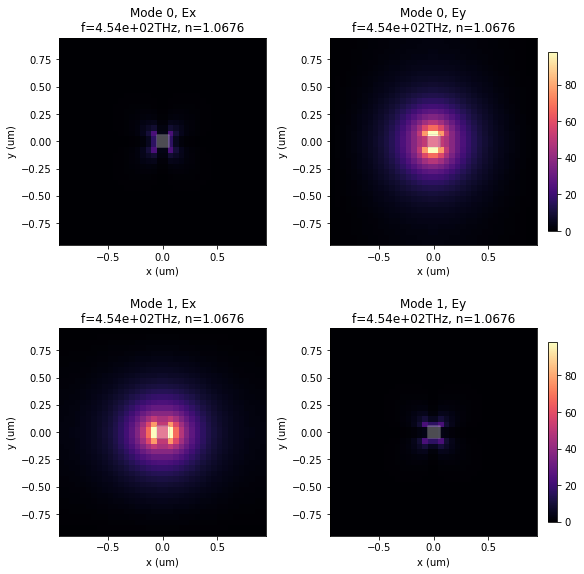

In [5]:
sim.gen_modes.local_preview(GP['h_min'])

In [6]:
base_dir = "modes2D_tidy3d_out_660nm/"
batch_path = "modes2D_saved_batch_index_660nm"
sim.gen_modes.upload(batch_path, base_dir)
sim.gen_modes.monitor()

Using Tidy3D credentials from stored file
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using 

Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational g

KeyboardInterrupt: 

In [5]:
sim.gen_modes.gen(load = True)
sim.gen_modes.count_modes()

Using Tidy3D credentials from stored file
modes lib load sucessed.
remove not needed keys...
key removed.
total keys:  39
number of non zero modes:  [33.]


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:125: UserWarning: expected total waveguides:38.0loaded:39
  warnings.warn("expected total waveguides:" + str(total_hs) + "loaded:" + str(load_total_hs))
C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:42: UserWarning: better make h_min larger, because some h that is too small to allow any mode to propagate.
  warnings.warn("better make h_min larger, because some h that is too small to allow any mode to propagate.")


In [ ]:
sim.gen_modes.vis_neffs()
H = [0.15, 0.22, 0.31]
sim.gen_modes.vis_field(H)

In [ ]:
sim.fitting_neffs.fit(vis=True, layers = 4, save_fig= False)
neffs = sim.fitting_neffs.apply(H)
print(neffs)

In [ ]:
sim.fftting_C.fit(load = False, vis=True, steps = 3000)

using device:  cuda
decay_rate: 0.79
total epoches:40000 [curr:    0 relative_error:102.143000%].
total epoches:40000 [curr: 4000 relative_error:2.178000%].
total epoches:40000 [curr: 8000 relative_error:1.883000%].
total epoches:40000 [curr:12000 relative_error:2.108000%].
total epoches:40000 [curr:16000 relative_error:1.604000%].
total epoches:40000 [curr:20000 relative_error:30.683000%].
total epoches:40000 [curr:24000 relative_error:0.699000%].
total epoches:40000 [curr:28000 relative_error:0.798000%].
total epoches:40000 [curr:32000 relative_error:0.326000%].
total epoches:40000 [curr:36000 relative_error:0.290000%].
total epoches:40000 [curr:39999 relative_error:0.262000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


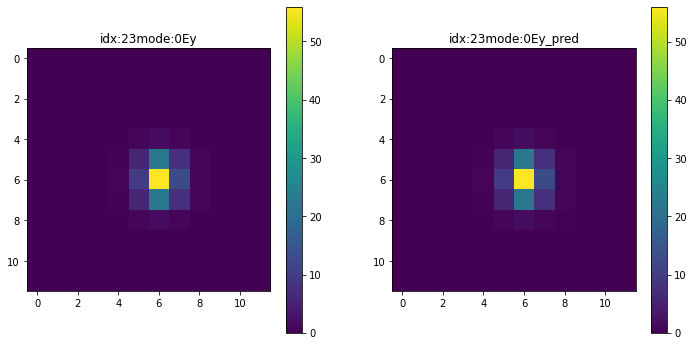

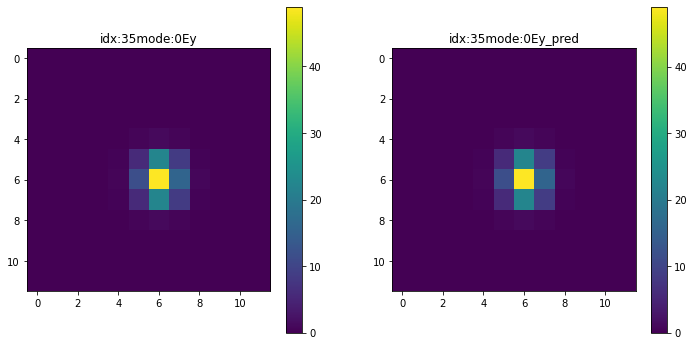

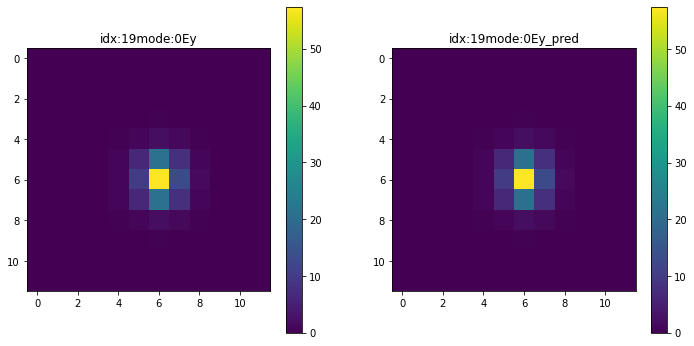

In [6]:
#if you change downsample_ratio, you should rerun fitting_E.
sim.fftting_E.fit(vis=True, layers = 5, steps = 40000)

In [ ]:
sim.fftting_K.fit(load = False, vis=True, steps = 6000)

In [ ]:
sim.PBA.gen_lib()

# Periodic boundary approximation design lens

In [ ]:
N = 30
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)
PBA_widths = np.load("PBA_widths_N" + str(N) + "lam_590.npy")

In [ ]:
sim.scmt.init_model(N, prop_dis, APPROX= 0, COUPLING = True, init_hs= PBA_widths, far_field= False)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)

In [ ]:
sim.scmt.init_model(N, prop_dis, APPROX= 1, Ni = 5 * N, COUPLING = True, init_hs= PBA_widths, far_field= False)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)

In [ ]:
sim.scmt.init_model(N, prop_dis, APPROX= 0, COUPLING = True, init_hs= PBA_widths, far_field= True)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)

In [ ]:
sim.scmt.init_model(N, prop_dis, APPROX= 1, Ni = 5 * N, COUPLING = True, init_hs= PBA_widths, far_field= True)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)

# fullwave validation

In [ ]:
sim.fullwave.init_sim(prop_dis, N, PBA_widths, res = 50, theta = 0)
sim.fullwave.upload(task_name="tidy3d_Apr25_N" + str(N) + "660nm")
sim.fullwave.download(data_path="output_cmt/")

In [ ]:
Ey_near, Ey_near_FW, Ey_far, Ey_far_FW = sim.fullwave.vis_monitor()

In [ ]:
plt.imshow(np.abs(Ey_far))

In [ ]:
plt.imshow(np.sqrt(E_out))